T_s = 0.8113135384980966, T_d = 0.9066563810051564
T_s = 0.6070805410208534, T_d = 0.6291099405342755
T_s = 0.7407567527515363, T_d = 0.6534116222981932


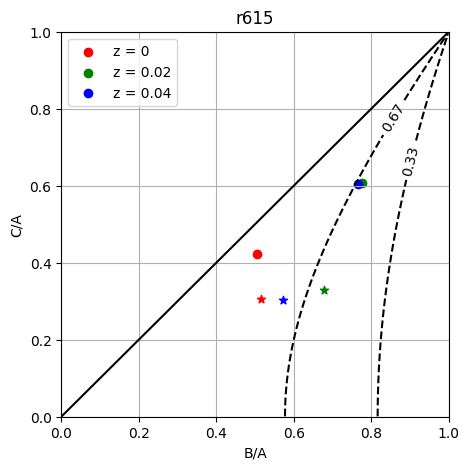

In [27]:
import os,pickle
import matplotlib.pylab as plt
from scipy.interpolate import UnivariateSpline as Smooth
from pynbody import array
import argparse
import traceback
import pathlib
import sys
import pandas as pd
import pynbody
import numpy as np
import matplotlib.pyplot as plt
feedbacks = ['MerianCDM']
ba_s = []
ca_s = []
ba_d =[]
ca_d = []
    
def T(ba,ca):
    return( (1-ba**2)/(1-ca**2) )

redshifts = [0,.02,.04]

for feedback in feedbacks:

    merger_shapes = pickle.load(open(f'../../Data/MergerShapes.{feedback}.pickle', 'rb'))
        
        #plot ba vs ca at Reff from merger shapes

    for sim in merger_shapes:
        fig, ax = plt.subplots(1,1, figsize=(5,5))
        ax.set_xlabel('B/A')
        ax.set_ylabel('C/A')
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        for halo in merger_shapes[sim]:
            colors = ['r','g','b']
            for snap,color,z  in zip( merger_shapes[sim][halo], colors, redshifts):
                ba_s = (merger_shapes[sim][halo][snap]['ba_s_smoothed_at_Reff'])
                ca_s = (merger_shapes[sim][halo][snap]['ca_s_smoothed_at_Reff'])
                ba_d = (merger_shapes[sim][halo][snap]['ba_d_smoothed_at_Reff'])
                ca_d =(merger_shapes[sim][halo][snap]['ca_d_smoothed_at_Reff'])
                T_s = T(ba_s,ca_s)
                T_d = T(ba_d,ca_d)
                print(f'T_s = {T_s}, T_d = {T_d}')
                ax.scatter(ba_s, ca_s, color = color, marker = '*')
                ax.scatter(ba_d, ca_d, color = color, label = f'z = {z}', marker = 'o')
                ax.plot([ba_s], color = color)
                
ax.legend()
ax.set_title('r615')
ax.grid()
#plot 1-1 line
x = np.linspace(0,1,100)
ax.plot(x,x, 'k-')
#add contours for T = 1/3,2/3
#create meshgrid for ba and ca
ba = np.linspace(0.001,.999,100)
ca = np.copy(ba)
BA,CA = np.meshgrid(ba,ca)
T = (1-BA**2)/(1-CA**2)
#label contours on the contour line
CS = ax.contour(BA,CA,T, levels = [1/3,2/3], colors = 'k', linestyles = 'dashed')
#format label as a fraction instead of decimal
fmt = {}
strs = [f'{1/3:.2f}',f'{2/3:.2f}']
for l,s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, inline = True, fmt = fmt)
plt.show()

                    
                    
            

In [8]:

merger_shapes = pickle.load(open(f'../../Data/MergerShapes.MerianCDM.pickle', 'rb'))

